# MNIST Data set

In [76]:
import tensorflow
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from skimage.morphology import erosion, diamond
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

path_to_data = '/home/fraga/Documents/Kaggle-Competitions/Digit Recognizer/Data/digit-recognizer/'

## Reading data and taking a look at it

In [2]:
train = pd.read_csv(path_to_data + 'train.csv')
test_x = pd.read_csv(path_to_data + 'test.csv')

In [3]:
print('Examples in train set {}'.format(train.shape[0]))
print('Examples in test set {}'.format(test_x.shape[0]))

Examples in train set 42000
Examples in test set 28000


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape

(42000, 785)

In [6]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
test_x.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


From here we can see that the pixel values range from 0 to 255, so we'll have to transform the data in order to make it range from 0 to 1 or -1 to 1.

## Visualizing some digits

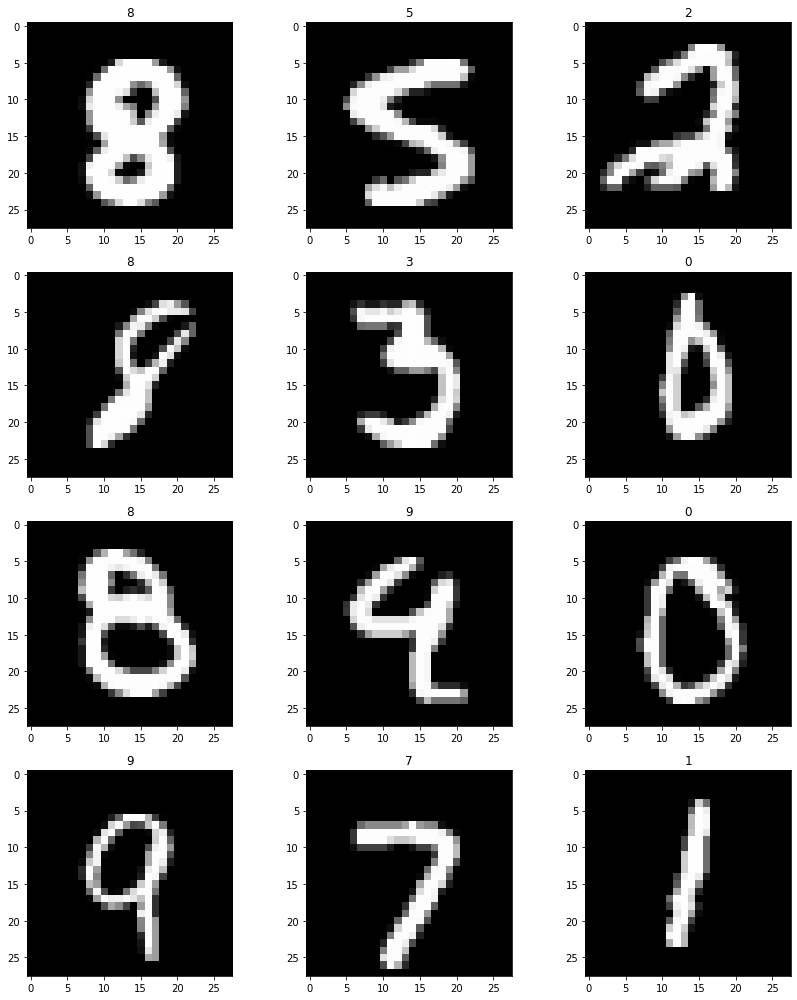

In [8]:
rows = 4
columns = 3

fig, ax = plt.subplots(rows, columns, figsize = (12, 14))

for i in range(rows):
    for j in range(columns):
        index = np.random.randint(train.shape[0])

        image = np.asarray(train.iloc[index][1:]).reshape((28, 28))
        label = train.iloc[index][0]

        ax[i][j].imshow(image, cmap = 'gray')
        ax[i][j].set_title(str(label))

plt.tight_layout()
plt.show()

## Preprocessing data

In [9]:
train_x = train.copy()

train_y = train_x['label']
del train_x['label']

## Convert to binary

In [10]:
def to_binary(image):
    binary = np.zeros(image.shape)
    for i in range(784):
        if(image[i] != 0):
            binary[i] = 1
    
    return binary

In [11]:
test = np.asarray(train_x)

for i in range(test.shape[0]):
    test[i] = to_binary(test[i])

train_x = pd.DataFrame(data = test)

test = np.asarray(test_x)

for i in range(test.shape[0]):
    test[i] = to_binary(test[i])

test_x = pd.DataFrame(data = test)

In [12]:
train_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00181,0.001071,0.000500,0.000214,0.000119,0.000048,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.04250,0.032716,0.022355,0.014637,0.010910,0.006901,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [13]:
test_x.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001321,0.000643,0.000429,0.000214,0.000071,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036328,0.025347,0.020698,0.014637,0.008451,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
train_x = train_x.values.reshape(-1, 28, 28, 1)
test_x = test_x.values.reshape(-1, 28, 28, 1)
train_y = tf.one_hot(train_y, depth = 10)

## Checking shapes

In [15]:
print("Train x shape {}".format(train_x.shape))
print("Train y shape {}".format(train_y.shape))

Train x shape (42000, 28, 28, 1)
Train y shape (42000, 10)


## Extracting the frontier of the numbers

Text(0.5, 1.0, 'Frontier')

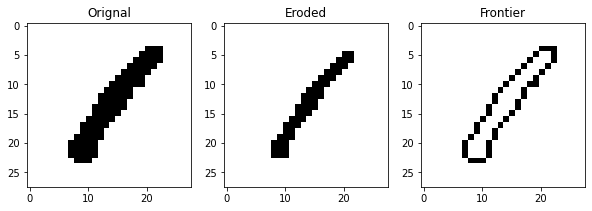

In [16]:
test = train_x[0,:,:,-1]
test_eroded = erosion(test, diamond(1))
frontier = np.copy(test)

for i in range(28):
    for j in range(28):
        if(test[i,j] != test_eroded[i,j]):
            frontier[i,j] = 1
        
        else:
            frontier[i,j] = 0
            
fig, ax = plt.subplots(1, 3, figsize = (10, 10))
ax[0].imshow(test, cmap = 'binary')
ax[0].set_title("Orignal")

ax[1].imshow(test_eroded, cmap = 'binary')
ax[1].set_title("Eroded")

ax[2].imshow(frontier, cmap = 'binary')
ax[2].set_title("Frontier")

In [17]:
def extract_frontier(image):
    test = image.copy()
    test_eroded = erosion(test, diamond(1))
    frontier = np.copy(test)

    for i in range(28):
        for j in range(28):
            if(test[i,j] != test_eroded[i,j]):
                frontier[i,j] = 1

            else:
                frontier[i,j] = 0
    
    return frontier

In [18]:
for i in range(train_x.shape[0]):
        train_x[i,:,:,-1] = extract_frontier(train_x[i,:,:,-1])
        
for i in range(test_x.shape[0]):
        test_x[i,:,:,-1] = extract_frontier(test_x[i,:,:,-1])

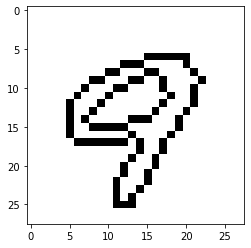

In [19]:
plt.imshow(train_x[100,:,:,-1], cmap = 'binary')

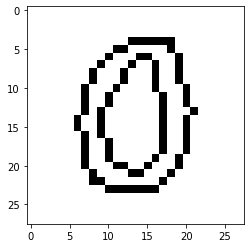

In [20]:
plt.imshow(test_x[100,:,:,-1], cmap = 'binary')

Now that we have checked our data and preprocessed it, we can move on to creating models to test them and choose the best one.  

## Creating DL model  
As we're working with images it is common to use a convolutional neural network, which is what we're going to do.

In [90]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)),
    Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'),
    Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation = "relu"),
    Dropout(0.5),
    Dense(10, activation = "softmax")
])

In [91]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy',
    metrics = ['acc', 'mse']
)

In [92]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)         

In [93]:
history = model.fit(train_x[..., np.newaxis], train_y, epochs = 7, batch_size = 32,
                    validation_split = 0.2)

Epoch 1/7
1050/1050 [==============================] - 186s 178ms/step - loss: 0.2901 - acc: 0.9074 - mse: 0.0132 - val_loss: 0.0916 - val_acc: 0.9713 - val_mse: 0.0045
Epoch 2/7
1050/1050 [==============================] - 193s 184ms/step - loss: 0.1096 - acc: 0.9667 - mse: 0.0050 - val_loss: 0.0744 - val_acc: 0.9768 - val_mse: 0.0036
Epoch 3/7
1050/1050 [==============================] - 192s 183ms/step - loss: 0.0865 - acc: 0.9734 - mse: 0.0041 - val_loss: 0.0749 - val_acc: 0.9761 - val_mse: 0.0035
Epoch 4/7
1050/1050 [==============================] - 191s 182ms/step - loss: 0.0774 - acc: 0.9769 - mse: 0.0036 - val_loss: 0.0813 - val_acc: 0.9760 - val_mse: 0.0037
Epoch 5/7
1050/1050 [==============================] - 173s 165ms/step - loss: 0.0706 - acc: 0.9801 - mse: 0.0032 - val_loss: 0.0622 - val_acc: 0.9825 - val_mse: 0.0026
Epoch 6/7
1050/1050 [==============================] - 180s 172ms/step - loss: 0.0670 - acc: 0.9803 - mse: 0.0031 - val_loss: 0.0641 - val_acc: 0.9829 - va

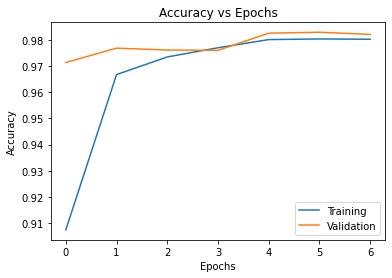

In [94]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()

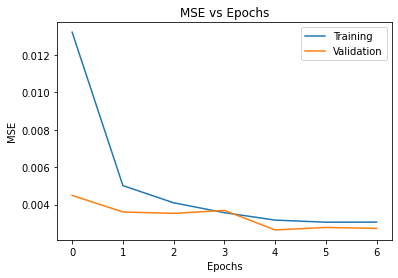

In [95]:
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('MSE vs Epochs')
plt.ylabel('MSE')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'])
plt.show()

In [96]:
predictions = model.predict(test_x).argmax(1)

In [97]:
index = []

for i in range(1, test_x.shape[0] + 1):
    index.append(i)

In [98]:
submission = pd.DataFrame()

submission['ImageId'] = index
submission['Label'] = predictions

submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [99]:
submission.to_csv('/home/fraga/Documents/Kaggle-Competitions/Digit Recognizer/Data/submission.csv', index = False)